In [28]:
from pathlib import Path
import os

# Setup main data path
data_path = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset")

# Define train and test paths
train_dir = data_path / "Train"
test_dir = data_path / "Test"

# Print paths to verify
print(f"Dataset Path: {data_path}")
print(f"Train Path: {train_dir}")
print(f"Test Path: {test_dir}")

# Set your dataset path
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

def walk_through_dir(dir_path):
    """Walks through dir_path and prints its structure."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        # Filter image files only
        image_files = [f for f in filenames if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"There are {len(dirnames)} directories and {len(image_files)} images in '{dirpath}'.")

# ✅ Make sure to define the function **before** calling it
dataset_path = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset"

# ✅ Call the function after defining it
walk_through_dir(dataset_path)



Dataset Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset
Train Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Train
Test Path: C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test
There are 2 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset'.
There are 4 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test'.
There are 0 directories and 552 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\cancer'.
There are 0 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\erythroplakia'.
There are 0 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\leukoplakia'.
There are 0 directories and 0 images in 'C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\Test\non-ca

Visualizing an image

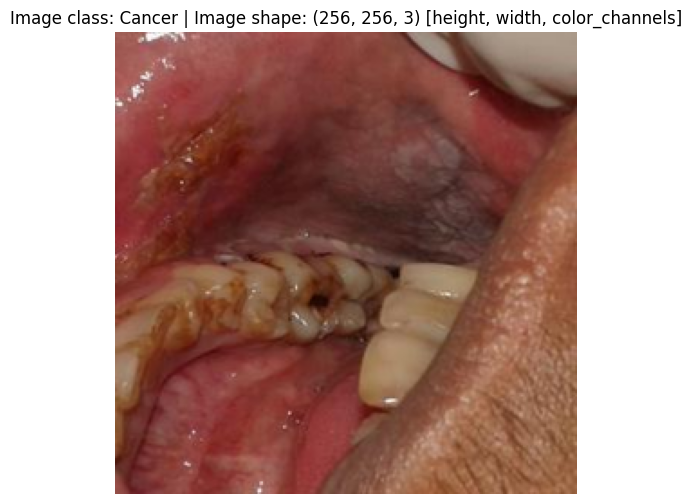

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set the path to your dataset
image_folder = r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\train\cancer"

# Get a random image from the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = np.random.choice(image_files)

# Load the image
img_path = os.path.join(image_folder, random_image)
img = Image.open(img_path)

# Resize while keeping aspect ratio
target_size = (256, 256)
img.thumbnail(target_size)  # Maintains aspect ratio

# Convert image to NumPy array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: Cancer | Image shape: {img_as_array.shape} [height, width, color_channels]")
plt.axis(False)
plt.show()


Transforming Data

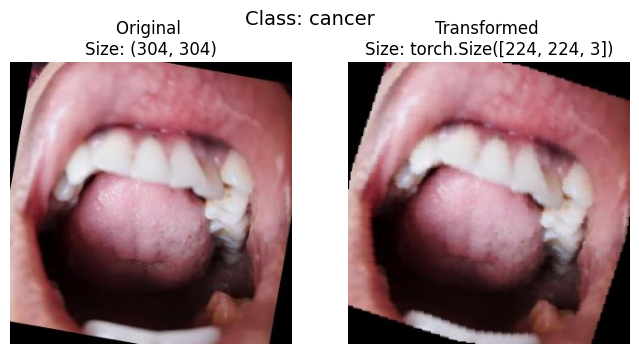

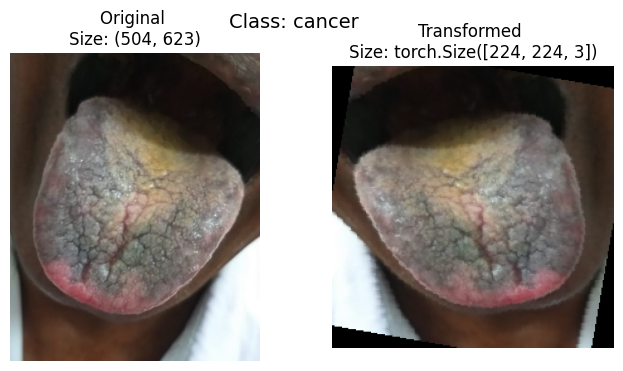

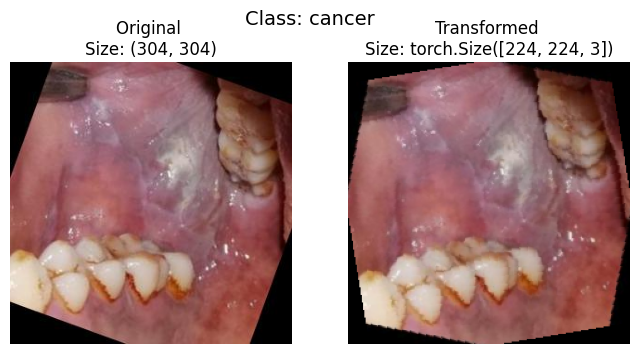

In [32]:
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import torchvision.transforms as transforms

# Define dataset path
image_folder = Path(r"C:\Users\tharu\OneDrive\Desktop\Image Recognition\Oral cancer dataset\train\cancer")

# Get all image paths
image_paths = [str(image_folder / f) for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Define transformations
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),  # Resize image
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


def denormalize(tensor, mean, std):
    """Reverses the normalization applied to an image tensor."""
    mean = torch.tensor(mean).view(1, 1, 3)  # Convert to PyTorch tensor
    std = torch.tensor(std).view(1, 1, 3)    # Convert to PyTorch tensor

    if isinstance(tensor, np.ndarray):  # Convert NumPy array to tensor
        tensor = torch.tensor(tensor)

    return tensor * std + mean  # Element-wise multiplication and addition


# Function to plot original and transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        image_path = Path(image_path)
        with Image.open(image_path).convert("RGB") as img:
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))

            # Original Image
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            # Transformed Image
            transformed_image = transform(img)  # Apply transform
            transformed_image = transformed_image.numpy().transpose(1, 2, 0)  # Convert to NumPy format

            # Denormalize for visualization
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            transformed_image = denormalize(transformed_image, mean, std).clip(0, 1)

            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=14)
            plt.show()

# Run the function
plot_transformed_images(image_paths, transform=data_transform, n=3)
